1. Use numpy para criar uma matriz (dataset) composta por valores numéricos aleatórios com 200 linhas (instâncias) e 12 colunas (características). Apresente o dataset.


In [23]:
import numpy as np

In [24]:
dataset = np.random.randint(low = 0, high = 500, size=(200, 12))

print(dataset)

[[482 209  58 ...   5 166 473]
 [273 274 239 ... 415 159 269]
 [490 135 294 ... 433 395 230]
 ...
 [467 467 345 ...   6 400 179]
 [432 394 106 ... 494 124  78]
 [491 446 447 ... 484 176 118]]


2. Converta o dataset do exercício 1 em um dataframe de pandas. As instâncias devem ser numeradas de 0 a 199 e as características nomeadas com letras de "a" a "l" (inclua "k" como coluna). Apresente o dataset no formato dataframe.


In [25]:
import pandas as pd

dataframe = pd.DataFrame(dataset, columns = [chr(i) for i in range(ord('a'), ord('l') + 1)])

dataframe.head()

,a,b,c,d,e,f,g,h,i,j,k,l
0,482,209,58,432,445,131,184,24,448,5,166,473
1,273,274,239,10,55,67,427,498,188,415,159,269
2,490,135,294,480,27,241,44,97,317,433,395,230
3,434,96,462,296,165,313,87,85,163,330,428,89
4,225,161,349,465,204,491,349,47,166,131,173,440


3. Mostre apenas as instâncias ímpares e as características "b", "e", "f" do dataset criado no exercício 2 ordenados crescentemente pelos valores da característica "f".


In [26]:
odd_dataframe = (
    dataframe.filter(["b", "e", "f"])
    .filter(range(1, len(dataframe), 2), axis="index")
    .sort_values("f")
)

display(odd_dataframe)

,b,e,f
75,365,57,35
59,451,130,36
151,363,124,42
85,348,230,45
99,292,47,50
...,...,...,...
27,53,3,465
173,88,387,478
147,427,143,483
35,165,46,496


4. Apresente a soma dos valores, os valores mínimos e máximos, a média e o desvio padrão de cada coluna do dataset do exercício 3. Apresente também o intervalo de confiança de cada característica.


In [27]:
from scipy import stats


def custom_describe(data: pd.DataFrame):
    # Finding the critical value
    std_dev = data.std()
    mean = data.mean()
    confidence_interval_low, confidence_interval_high = stats.norm.interval(
        0.95, loc=mean, scale=std_dev / np.sqrt(len(data))
    )

    summary = {
        "sum": data.sum(),
        "mean": mean,
        "std": std_dev,
        "min": data.min(),
        "max": data.max(),
        "confidence interval low": confidence_interval_low,
        "confidence interval high": confidence_interval_high,
    }

    # Creating a resulting DataFrame with the stats, just for displaying
    df_summary = pd.DataFrame(summary)

    return df_summary


display(custom_describe(odd_dataframe))

,sum,mean,std,min,max,confidence interval low,confidence interval high
b,23834,238.34,142.234493,4,493,210.462552,266.217448
e,23319,233.19,141.730980,0,496,205.411238,260.968762
f,25761,257.61,125.491510,35,497,233.014116,282.205884


5. Faça um gráfico de caixas com dados de cada característica (coluna) do dataframe do exercício 2.


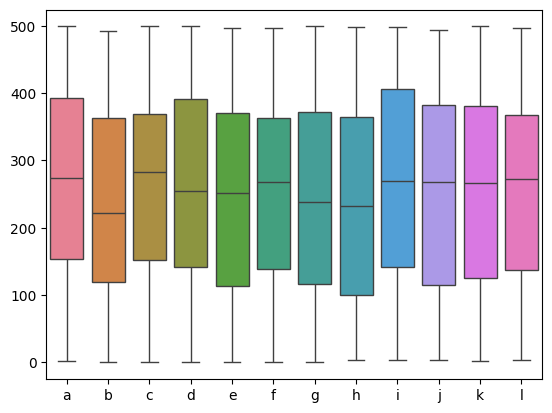

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(dataframe)
plt.show()

6. Obtenha média, desvio padrão e intervalo de confiança de cada característica da base iris. Contraste os resultados com os obtidos fazendo um gráfico de barras com intervalo de confiança.


,sum,mean,std,min,max,confidence interval low,confidence interval high
sepal_length,876.5,5.843333,0.828066,4.3,7.9,5.710818,5.975849
sepal_width,458.6,3.057333,0.435866,2.0,4.4,2.987581,3.127085
petal_length,563.7,3.758000,1.765298,1.0,6.9,3.475499,4.040501
petal_width,179.9,1.199333,0.762238,0.1,2.5,1.077352,1.321315


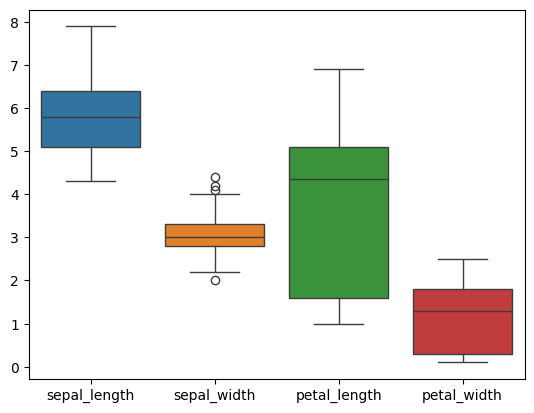

In [29]:
# Load the Iris dataset
iris = sns.load_dataset('iris').drop(columns='species')

# display(sns.load_dataset('iris').head())

display(custom_describe(iris))

sns.boxplot(iris)
plt.show()

7. Faça um histograma com 7 faixas equidistantes de valores para a característica `sepal_width` da base iris.


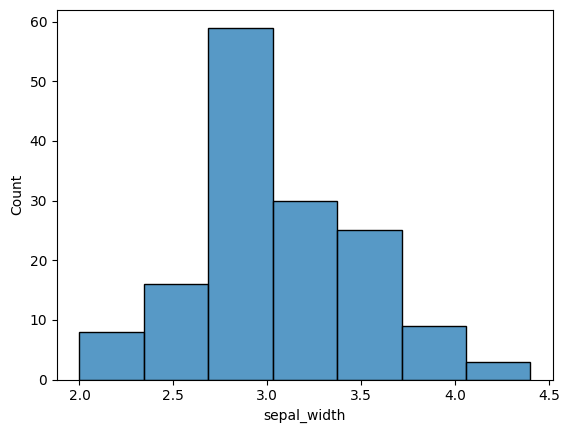

In [30]:
sns.histplot(iris["sepal_width"], bins=7)
plt.show()

8. Faça um gráfico de dispersão apresentando os dados das caraterísticas `sepal_length` e `sepal_width` diferenciando os exemplos de cada classe.


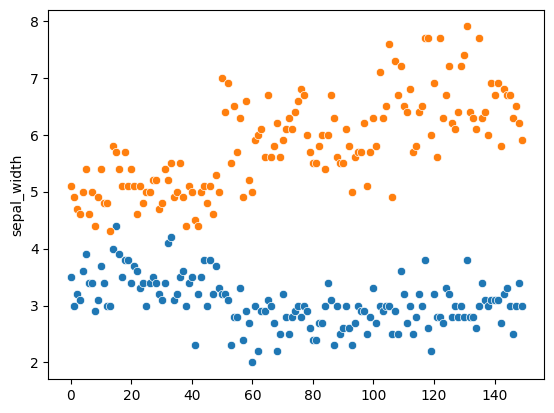

In [31]:
sns.scatterplot(iris["sepal_width"])
sns.scatterplot(iris["sepal_length"])
plt.show()

9. Apresente um gráfico com a projeção TSNE criado no exercício 1.

(200, 12)
(200, 2)


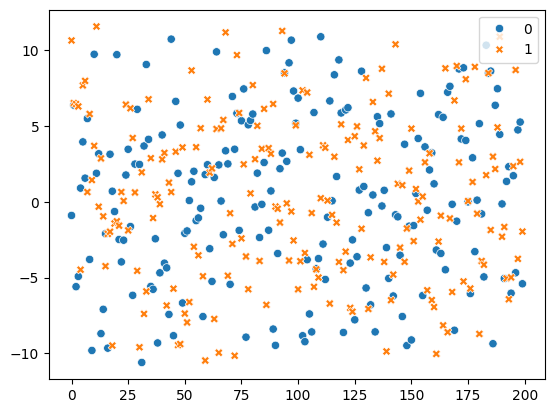

In [32]:
from sklearn.manifold import TSNE

print(dataset.shape)

tsne = TSNE(2)
tsne_dataset = tsne.fit_transform(dataset)

print(tsne_dataset.shape)

sns.scatterplot(tsne_dataset)
plt.show()